In [ ]:
filename='374'

In [ ]:
rfile='374.csv'

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(rfile)
df.head()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
2995,2018-11-30,12.49,12.60,12.30,12.59,10.385250,5545700,0.0,0.0
2996,2018-12-03,12.54,12.64,12.34,12.62,10.409995,2795500,0.0,0.0
2997,2018-12-04,12.55,12.63,12.42,12.58,10.377000,2915800,0.0,0.0
2998,2018-12-05,12.50,12.50,12.07,12.10,9.981056,8120600,0.0,0.0
2999,2018-12-06,12.19,12.21,11.78,11.90,9.816081,4666000,0.0,0.0


In [ ]:
df2=df.reset_index()['Close']
df2

0       12.47
1       12.10
2       11.54
3       11.10
4       10.92
        ...  
2995    12.59
2996    12.62
2997    12.58
2998    12.10
2999    11.90
Name: Close, Length: 3000, dtype: float64

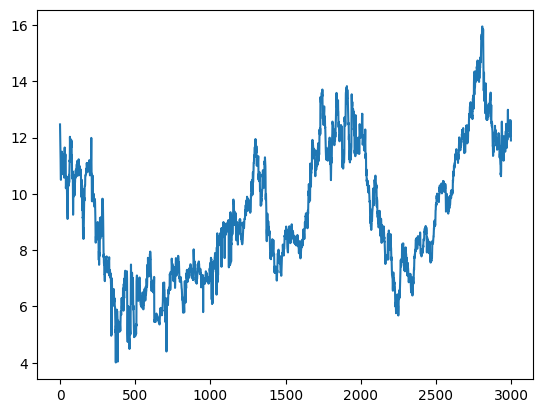

In [ ]:
 import matplotlib.pyplot as plt
 plt.plot(df2)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
df2

array([[0.70854274],
       [0.67755448],
       [0.63065327],
       ...,
       [0.71775544],
       [0.67755448],
       [0.66080399]])

In [ ]:
df2.shape

(3000, 1)

In [ ]:
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY=[], []
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [ ]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [ ]:
print(X_test.shape), print(y_test.shape)

(949, 100)
(949,)


(None, None)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout,LeakyReLU

In [ ]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(100,1)))
model.add(LeakyReLU(alpha=0.001))
model.add(Dropout(0.3))
model.add(LSTM(128,return_sequences=True))
model.add(LeakyReLU(alpha=0.001))
model.add(Dropout(0.3))
model.add(LSTM(128))
model.add(LeakyReLU(alpha=0.001))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
29/29 [==============================] - 13s 61ms/step - loss: 0.0303 - val_loss: 0.0047
Epoch 2/50
29/29 [==============================] - 1s 23ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 3/50
29/29 [==============================] - 1s 27ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 4/50
29/29 [==============================] - 1s 24ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 5/50
29/29 [==============================] - 1s 20ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 6/50
29/29 [==============================] - 1s 21ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 7/50
29/29 [==============================] - 1s 19ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 8/50
29/29 [==============================] - 1s 18ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 9/50
29/29 [==============================] - 1s 20ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 10/50
29/29 [==============================] - 1s 21ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 11

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

30/30 [==============================] - 0s 5ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

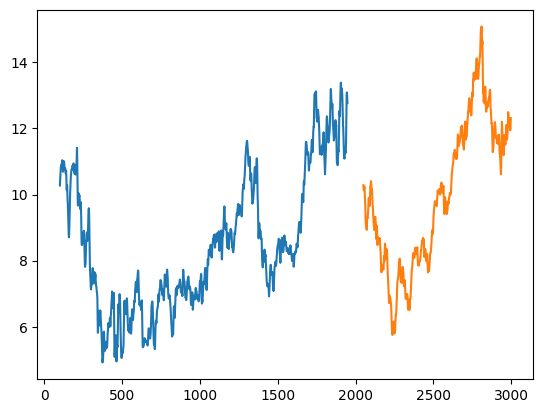

In [ ]:
look_back=100
trainPredictPlot=numpy.empty_like(df2)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=numpy.empty_like(df2)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1,:]=test_predict
#plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#plt.plot(scaler.inverse_transform(df2))

In [ ]:
len(test_data)

1050

In [ ]:
x_input=test_data[950:].reshape(1,-1)
x_input.shape
x_input

array([[0.66164153, 0.64572867, 0.66917923, 0.66080399, 0.64824121,
        0.66499161, 0.64991629, 0.63316581, 0.65242883, 0.65410383,
        0.64237859, 0.64154105, 0.63819097, 0.66499161, 0.64656613,
        0.63567843, 0.64824121, 0.68257956, 0.66415407, 0.64405359,
        0.67671694, 0.65410383, 0.63902851, 0.62144056, 0.60971524,
        0.61809048, 0.62144056, 0.60971524, 0.599665  , 0.58961476,
        0.58710222, 0.55862649, 0.56448911, 0.55443887, 0.56951427,
        0.64489113, 0.63484089, 0.68090456, 0.71608044, 0.7169179 ,
        0.67922948, 0.65661645, 0.67504186, 0.65829145, 0.61306532,
        0.65410383, 0.65661645, 0.64321605, 0.62479064, 0.61725294,
        0.60050254, 0.61725294, 0.65661645, 0.67252931, 0.67252931,
        0.65745391, 0.65745391, 0.65829145, 0.66415407, 0.64405359,
        0.65410383, 0.62730319, 0.64405359, 0.66499161, 0.6758794 ,
        0.68844218, 0.66666669, 0.71021774, 0.6850921 , 0.66917923,
        0.6758794 , 0.67252931, 0.63902851, 0.65

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.6616415323422202,
 0.6457286691043137,
 0.6691792338288899,
 0.6608039922054293,
 0.6482412096424625,
 0.6649916130171597,
 0.649916289916044,
 0.6331658066691231,
 0.6524288304541926,
 0.6541038308555507,
 0.6423785884293741,
 0.6415410482925834,
 0.638190967617644,
 0.6649916130171597,
 0.6465661293688809,
 0.6356784270794955,
 0.6482412096424625,
 0.6825795565286478,
 0.6641540728803689,
 0.6440535888307322,
 0.6767169353155597,
 0.6541038308555507,
 0.6390285077544348,
 0.6214405642429466,
 0.6097152419445468,
 0.6180904835680073,
 0.6214405642429466,
 0.6097152419445468,
 0.5996649999197283,
 0.58961475789491,
 0.5871022173567614,
 0.5586264916836641,
 0.5644891128967523,
 0.554438870871934,
 0.5695142738452733,
 0.644891128967523,
 0.6348408869427046,
 0.6809045561272898,
 0.716080443150266,
 0.7169179034148333,
 0.6792294758537084,
 0.656616451265923,
 0.6750418550419782,
 0.6582914516672808,
 0.6130653226194864,
 0.6541038308555507,
 0.656616451265923,
 0.6432160486939414,
 

In [ ]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<100):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    #print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape(1,n_steps)
    y_output=model.predict(x_input)
    #print("{} day output {}".format(i,y_output))
    temp_input.extend(y_output[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(y_output.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps))
    y_output=model.predict(x_input)
    temp_input.extend(y_output[0].tolist())
    lst_output.extend(y_output[0].tolist())
    i=i+1

print(lst_output)

1/1 [==============================] - 0s 30ms/step
[[0.47332897782325745], [0.4732496440410614], [0.47317346930503845], [0.4731003940105438], [0.47303035855293274], [0.47296324372291565], [0.47289904952049255], [0.4728376269340515], [0.47277888655662537], [0.4727227985858917], [0.47266915440559387], [0.47261789441108704], [0.47256895899772644], [0.472522109746933], [0.4724772870540619], [0.47243446111679077], [0.4723934233188629], [0.47235408425331116], [0.4723164737224579], [0.4722803831100464], [0.47224581241607666], [0.47221267223358154], [0.47218093276023865], [0.47215044498443604], [0.4721212685108185], [0.4720933139324188], [0.47206658124923706], [0.47204092144966125], [0.4720163643360138], [0.4719928801059723], [0.47197040915489197], [0.47194889187812805], [0.47192829847335815], [0.4719085991382599], [0.47188976407051086], [0.4718717038631439], [0.47185441851615906], [0.4718378782272339], [0.471822053194046], [0.47180691361427307], [0.4717923700809479], [0.4717784821987152], [0

In [ ]:
predicted=scaler.inverse_transform(lst_output)

In [ ]:
predicted

array([[14.56975136],
       [14.56811421],
       [14.56654225],
       [14.56503425],
       [14.56358898],
       [14.56220398],
       [14.56087925],
       [14.55961172],
       [14.55839954],
       [14.55724209],
       [14.55613508],
       [14.55507726],
       [14.55406742],
       [14.55310063],
       [14.55217566],
       [14.55129189],
       [14.55044502],
       [14.54963321],
       [14.54885707],
       [14.5481123 ],
       [14.54739889],
       [14.546715  ],
       [14.54606001],
       [14.54543086],
       [14.54482877],
       [14.54425189],
       [14.54370023],
       [14.54317071],
       [14.54266394],
       [14.54217931],
       [14.5417156 ],
       [14.54127156],
       [14.54084659],
       [14.54044007],
       [14.54005138],
       [14.53967869],
       [14.53932198],
       [14.53898065],
       [14.53865409],
       [14.53834166],
       [14.53804154],
       [14.53775494],
       [14.53748003],
       [14.53721743],
       [14.53696527],
       [14

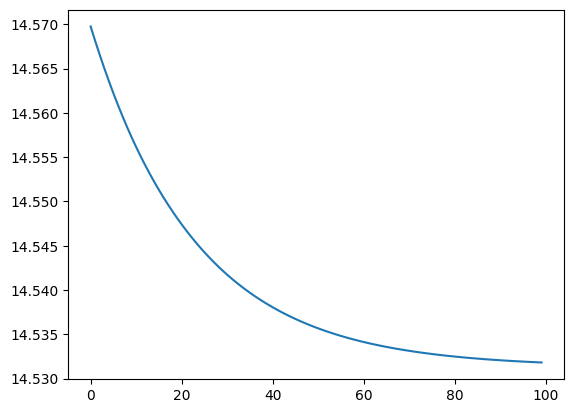

In [ ]:
plt.plot(predicted)

In [ ]:
id=[]
for i in range(100):
  id.append(filename+'_#'+str(i+1))

In [ ]:
pre=[]
for i in range(100):
  pre.append(predicted[i][0])

In [ ]:
pre

[14.569751360437506,
 14.56811420859749,
 14.566542247627138,
 14.56503424751004,
 14.563588978229786,
 14.56220397975356,
 14.560879252081362,
 14.55961172017217,
 14.55839953900137,
 14.557242093560758,
 14.556135078792904,
 14.5550772646814,
 14.554067421209835,
 14.553100628312576,
 14.552175655973214,
 14.551291889183544,
 14.550445022886136,
 14.549633212056376,
 14.54885707170247,
 14.548112296766986,
 14.547398887249924,
 14.546714998126673,
 14.546060014389026,
 14.545430860995962,
 14.54482876796389,
 14.544251890268198,
 14.543700227908884,
 14.543170705844927,
 14.542663939084532,
 14.542179312619494,
 14.541715596433404,
 14.541271560509854,
 14.540846589840639,
 14.540440069417555,
 14.540051384232397,
 14.539678689260553,
 14.539321984502022,
 14.5389806549486,
 14.538654085592084,
 14.538341661424267,
 14.538041537420538,
 14.537754943597305,
 14.537480034929954,
 14.537217426426691,
 14.536965273062902,
 14.536724189846792,
 14.536492946761951,
 14.53627154380838,
 14.

.

.

In [ ]:
dfs=pd.read_csv('Submission.csv')

In [ ]:
id_initial=dfs['ID']

In [ ]:
dfi=pd.DataFrame({'ID':id})
dfi.insert(1,"Closing",pre,True)

In [ ]:
dfss=pd.concat([dfs,dfi],axis=0)
dfss

,ID,Closing
0,003_#1,197.655685
1,003_#2,197.556461
2,003_#3,197.458767
3,003_#4,197.362547
4,003_#5,197.267800
...,...,...
95,473_#96,14.531917
96,473_#97,14.531891
97,473_#98,14.531867
98,473_#99,14.531842


In [ ]:
dfss.to_csv('Submission.csv',index=False)

In [ ]:
#sub=pd.DataFrame({'ID':id})

In [ ]:
#sub.insert(1,"Closing",pre,True)

In [ ]:
#sub.to_csv('Submission.csv',index=False)